## Strategy

> To trade support and resistance levels as well as some well known chart patterns

### *Signals*

> Bounce on resistance / pass support for 2 days = sell

> Bounce on support / pass resistance for 2 days = buy

> Head and shoulders trade


In [5]:
# imports 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
plt.style.use('fivethirtyeight')
import math
import seaborn as sns
from datetime import datetime
from scipy.signal import argrelextrema


In [31]:
# data import 
df = pd.read_excel('Time Series Data.xlsx', index_col = 'Day')
df = df.iloc[0:365]


In [32]:
# Identifying turning points

def get_max_min(prices, smoothing, window_range):
    
    smooth_prices = prices.rolling(window=smoothing).mean().dropna()
    local_max = argrelextrema(smooth_prices.values, np.greater)[0]
    local_min = argrelextrema(smooth_prices.values, np.less)[0]
    price_local_max_dt = []
    
    for i in local_max:
        if (i>window_range) and (i<len(prices)-window_range):
            price_local_max_dt.append(prices.iloc[i-window_range:i+window_range].idxmax())
    price_local_min_dt = []
    for i in local_min:
        if (i>window_range) and (i<len(prices)-window_range):
            price_local_min_dt.append(prices.iloc[i-window_range:i+window_range].idxmin())  
            
    maxima = pd.DataFrame(prices.loc[price_local_max_dt])
    minima = pd.DataFrame(prices.loc[price_local_min_dt])
    
    max_min = pd.concat([maxima, minima]).sort_index()
    max_min.index.name = 'date'
    max_min = max_min.reset_index()
    max_min = max_min[~max_min.date.duplicated()]
    p = prices.reset_index()   
    max_min['day_num'] = p[p['Day'].isin(max_min.date)].index.values
    max_min = max_min.set_index('day_num')
    
    return max_min

smoothing = 3
window = 10

minmax = get_max_min(df['Series 1'], smoothing, window)
minmax

,date,Series 1
day_num,,
11,11,100.482035
17,17,97.136867
23,23,89.739548
25,25,90.706678
40,40,97.654098
41,41,97.589827
42,42,97.814776
56,56,106.705638
60,60,108.587868


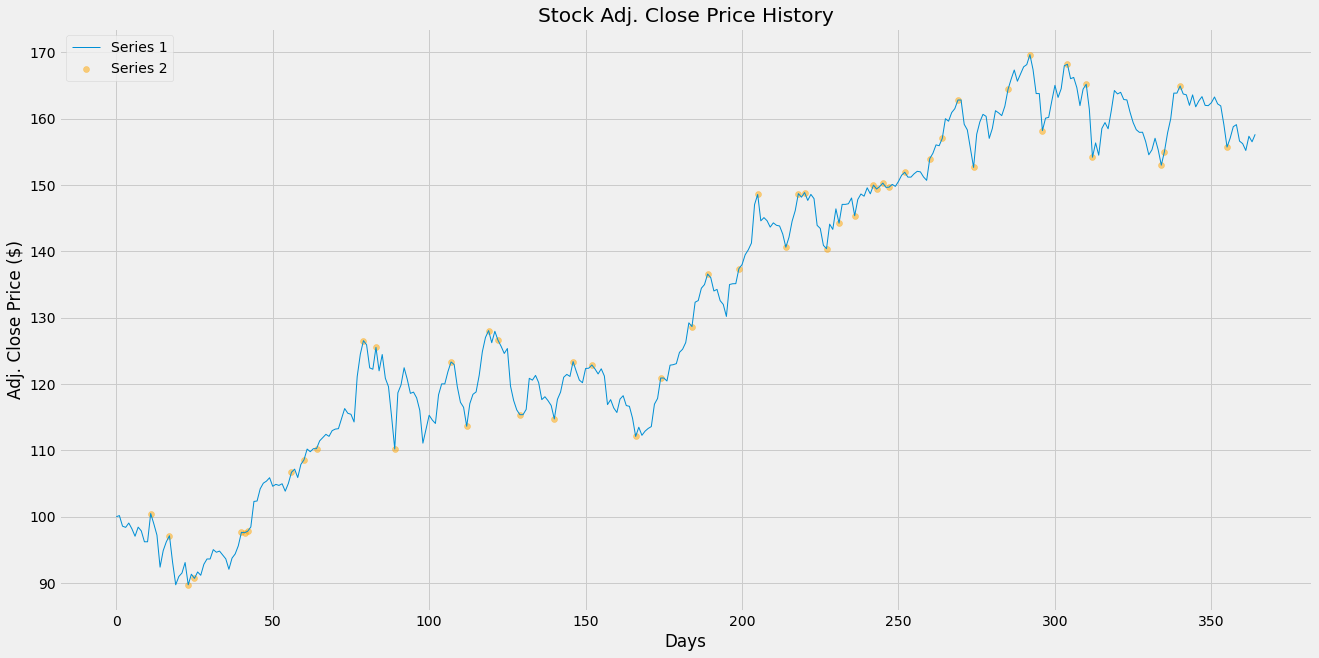

In [33]:
# plotting turning points
#Visualise the data
plt.figure(figsize=(20, 10))
plt.plot(df.reset_index()['Series 1'], linewidth = 1)
plt.scatter(minmax.index, minmax['Series 1'].values, color='orange', alpha=.5)
plt.title('Stock Adj. Close Price History')
plt.xlabel('Days')
plt.ylabel('Adj. Close Price ($)')
plt.legend(df, loc='upper left')
plt.show()


In [28]:
minmax.index


Int64Index([  11,   17,   23,   25,   40,   41,   42,   56,   60,   64,
            ...
            2542, 2549, 2552, 2558, 2565, 2567, 2582, 2586, 2589, 2605],
           dtype='int64', name='day_num', length=423)

In [29]:
minmax.values

array([[  11.        ,  100.48203465],
       [  17.        ,   97.13686723],
       [  23.        ,   89.73954826],
       [  25.        ,   90.70667809],
       [  40.        ,   97.65409806],
       [  41.        ,   97.58982677],
       [  42.        ,   97.81477627],
       [  56.        ,  106.70563751],
       [  60.        ,  108.58786803],
       [  64.        ,  110.261982  ],
       [  79.        ,  126.55169248],
       [  83.        ,  125.52794271],
       [  89.        ,  110.21148314],
       [ 107.        ,  123.33659791],
       [ 112.        ,  113.64081533],
       [ 119.        ,  128.06512824],
       [ 122.        ,  126.61596376],
       [ 129.        ,  115.3883822 ],
       [ 140.        ,  114.75179041],
       [ 146.        ,  123.39627839],
       [ 152.        ,  122.8821081 ],
       [ 166.        ,  112.11207688],
       [ 174.        ,  120.9157128 ],
       [ 184.        ,  128.67264492],
       [ 189.        ,  136.59331579],
       [ 199.        ,  1